5000 steps took 0.024178981781 seconds
E: -2.6413867e+33
v0_vec: [     0.          29747.08929167      0.        ]
M: 1.99e+30
T: 31683025.7521
r0_vec: [  1.50000000e+11   0.00000000e+00   0.00000000e+00]
(5000, 6)
[[  1.50000000e+11   0.00000000e+00   0.00000000e+00   0.00000000e+00
    2.97470893e+04   0.00000000e+00]
 [  1.44606170e+11   1.86234741e+08   0.00000000e+00  -1.72310135e+06
    2.86375193e+04   0.00000000e+00]
 [  1.27552210e+11   3.56820466e+08   0.00000000e+00  -3.74280697e+06
    2.45119453e+04   0.00000000e+00]
 [  9.51613550e+10   4.81718769e+08   0.00000000e+00  -6.77274587e+06
    1.26049453e+04   0.00000000e+00]
 [  2.97822413e+10   3.99016833e+08   0.00000000e+00  -1.79238912e+07
   -9.03180012e+04   0.00000000e+00]]


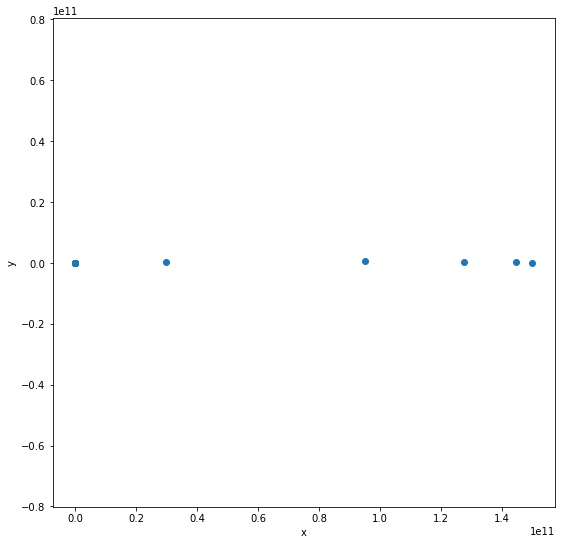

In [94]:
import orbit_calculations as oc
reload(orbit_calculations)

%matplotlib inline

a = oc.get_SI('aEarthSun')
e = oc.get_SI('eEarth')
mEarth = oc.get_SI('mEarth')
MSun = oc.get_SI('mSun')
G = oc.get_SI('G')
mu = (mEarth * MSun) / (mEarth + MSun)

y_out = oc.generate_orbit_pos_vel(a, e=0, m1=MSun, m2=mEarth, circum_steps=5000)


plt.fig1 = plt.figure(figsize=(9,9))

print(y_out.shape)
print(y_out[0:5])
plt.scatter(y_out[:,0], y_out[:,1])
plt.axes().set_aspect('equal', 'datalim')
plt.ylabel('y'); plt.xlabel('x')



original took 0.551054000854 sec for 100 steps


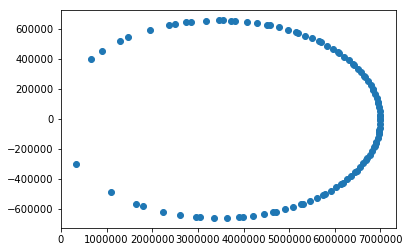

[[  7.00000000e+06   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+03   0.00000000e+00]
 [  1.29344903e+06   5.19031758e+05   0.00000000e+00  -2.11983445e+04
   -3.09452845e+03   0.00000000e+00]
 [  6.96808840e+06  -8.83973920e+04   0.00000000e+00   7.22075957e+02
    9.95418837e+02   0.00000000e+00]
 [  2.73108848e+06   6.44413084e+05   0.00000000e+00  -1.30719637e+04
   -5.21311824e+02   0.00000000e+00]
 [  6.87176281e+06  -1.75975831e+05   0.00000000e+00   1.45725074e+03
    9.81342271e+02   0.00000000e+00]]


In [90]:
def dY_dt(y_now, t):
    y_next = np.zeros(6)  #  x, y, z, vx, vy, vz
    y_next[:3] = y_now[3:]    #  dx/dt = v
    one_over_r_cubed = ((y_next[:3]**2).sum())**-1.5
    y_next[3:] = - Gm * y_now[:3] * one_over_r_cubed
    return y_next

t_final = 10**5 # seconds
dt = 1000 # seconds

t = np.arange(0, t_final, dt)
#y0 = np.array([])
y0 = np.array([7.e6, 0., 0., 0., 1.e3, 0.])

start = time()
y = odeint(dr_dt, y0, t)
print('original took {} sec for {} steps'.format(time() - start, t_final / dt))
plt.scatter(y[:,0], y[:,1])
plt.show()

print(y[0:5])

In [69]:
a = np.array([1,2])
b = np.array([3, 4])
c = np.array([5])

d = np.zeros([10, 5])
d[1] = np.concatenate([a,b,c])
print(d)

[[ 0.  0.  0.  0.  0.]
 [ 1.  2.  3.  4.  5.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
